In [1]:
import numpy as np
import tensorflow as tf
from keras.datasets import mnist
from tensorflow.keras.models import Sequential
#from ann_visualizer.visualize import ann_viz
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt

In [2]:
from keras.callbacks import CSVLogger

In [3]:
csv_logger = CSVLogger("model_history_log.csv", append=True)

In [4]:
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

In [5]:
#loding the images
#train_images = mnist.train_images()
#train_labels = mnist.train_labels()
print(len(train_labels))
#test_images = mnist.test_images()
#test_labels = mnist.test_labels()
print(len(test_labels))

# Normalize the images. Pixel values are between 0-255 in image learning it is
# good practice to normalize your data to a smaller range like between 0 and 1.
train_images = (train_images / 255) - 0.5
#print(train_images)
test_images = (test_images / 255) - 0.5
#print(test_images)

60000
10000


In [6]:
#lets give the hyper parameters
num_filters = 1
filter_size = 9
pool_size = 2

# Model is being trained on 1875 batches of 32 images each, not 1875 images. 1875*32 = 60000 images
# Build the model.
model = Sequential([
  Conv2D(num_filters, filter_size, input_shape=(28, 28, 1)),
  MaxPooling2D(pool_size=pool_size),
  Flatten(),
  Dense(10, activation='softmax'),
])

In [7]:
# Compile the model.
model.compile(
  'adam',
  loss='categorical_crossentropy',
  metrics=['accuracy'],
)

In [8]:
tf.keras.callbacks.EarlyStopping(
      monitor="loss",
      min_delta=0,
      patience=0,
      verbose=0,
      mode="auto",
      baseline=None,
      restore_best_weights=False,
    )

In [9]:
callback_1 = tf.keras.callbacks.EarlyStopping(monitor='loss', patience=2)

In [10]:
# Train the model.
history = model.fit(
  train_images,
  to_categorical(train_labels),
  epochs=10,
  validation_data=(test_images, to_categorical(test_labels)),
  callbacks=[csv_logger, callback_1],
)

Epoch 1/10


1875/1875 [==============================] - 6s 3ms/step - loss: 0.5786 - accuracy: 0.8205 - val_loss: 0.3543 - val_accuracy: 0.8982
Epoch 2/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3544 - accuracy: 0.8970 - val_loss: 0.3251 - val_accuracy: 0.9090
Epoch 3/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3310 - accuracy: 0.9025 - val_loss: 0.3118 - val_accuracy: 0.9110
Epoch 4/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3186 - accuracy: 0.9066 - val_loss: 0.2992 - val_accuracy: 0.9143
Epoch 5/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3097 - accuracy: 0.9092 - val_loss: 0.2952 - val_accuracy: 0.9163
Epoch 6/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3028 - accuracy: 0.9124 - val_loss: 0.2915 - val_accuracy: 0.9170
Epoch 7/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2971 - accuracy: 0.9133 - val_loss: 0.2892 - val_accurac

In [11]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 20, 20, 1)         82        
                                                                 
 max_pooling2d (MaxPooling2  (None, 10, 10, 1)         0         
 D)                                                              
                                                                 
 flatten (Flatten)           (None, 100)               0         
                                                                 
 dense (Dense)               (None, 10)                1010      
                                                                 
Total params: 1092 (4.27 KB)
Trainable params: 1092 (4.27 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [12]:
#Save the model:
model.save_weights('cnn.h5')

# Load the model's saved weights.
model.load_weights('cnn.h5')

In [13]:
# Predict on the first 10 test images.
predictions = model.predict(test_images[:10])

# Print our model's predictions.
print(np.argmax(predictions, axis=1)) # [7, 2, 1, 0, 4]

# Check our predictions against the ground truths.
print(test_labels[:10]) # [7, 2, 1, 0, 4]

1/1 [==============================] - 0s 92ms/step
[7 2 1 0 4 1 4 9 6 9]
[7 2 1 0 4 1 4 9 5 9]


In [14]:
#Callback records events into a History object.
accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

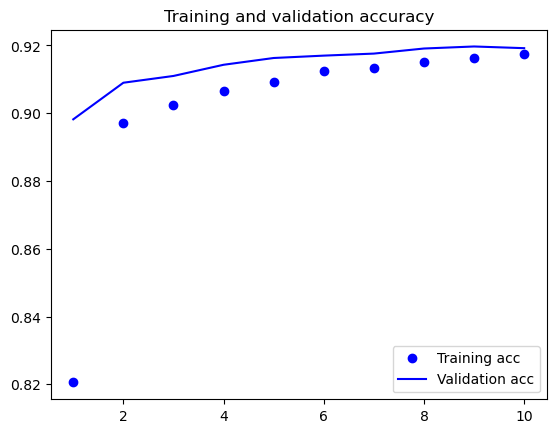

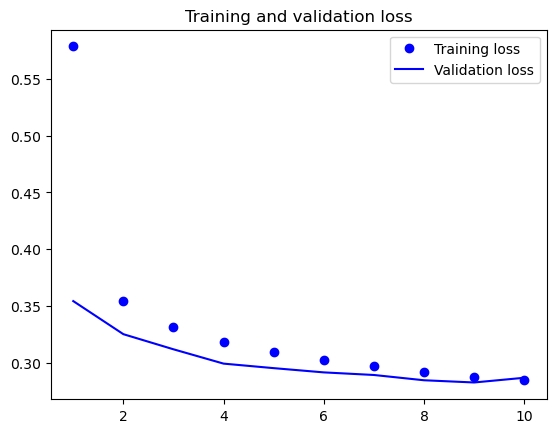

In [15]:
#The range of epochs, from 1 to the total number of epochs, is often used to plot the learning curves of the model.
#the range function is used to generate a list of integers from 1 to the length of the accuracy list plus one.
# This is because the accuracy list is typically recorded at the end of each epoch, starting from the first epoch.
epochs = range(1, len(accuracy) + 1)

plt.plot(epochs, accuracy, 'bo', label='Training acc')
plt.plot(epochs, val_accuracy, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [16]:
from tensorflow.keras.utils import plot_model
plot_model(model, to_file='model_plot.png', show_shapes=True, show_layer_names=True)

AttributeError: module 'pydot' has no attribute 'InvocationException'

In [17]:
! git clone https://github.com/samson6460/tf_keras_gradcamplusplus

Cloning into 'tf_keras_gradcamplusplus'...


In [18]:
%cd tf_keras_gradcamplusplus

d:\Computer Vision\tf_keras_gradcamplusplus


In [19]:
! pip install -r requirement.txt

   ---------------------------------------- 0.0/38.6 MB ? eta -:--:--
   ---------------------------------------- 0.0/38.6 MB ? eta -:--:--
   ---------------------------------------- 0.0/38.6 MB 445.2 kB/s eta 0:01:27
   ---------------------------------------- 0.1/38.6 MB 563.7 kB/s eta 0:01:09
   ---------------------------------------- 0.1/38.6 MB 853.3 kB/s eta 0:00:46
   ---------------------------------------- 0.2/38.6 MB 1.1 MB/s eta 0:00:35
   ---------------------------------------- 0.4/38.6 MB 1.6 MB/s eta 0:00:25
    --------------------------------------- 0.5/38.6 MB 1.9 MB/s eta 0:00:21
    --------------------------------------- 0.7/38.6 MB 2.0 MB/s eta 0:00:19
   - -------------------------------------- 1.2/38.6 MB 2.9 MB/s eta 0:00:13
   - -------------------------------------- 1.5/38.6 MB 3.4 MB/s eta 0:00:11
   -- ------------------------------------- 2.3/38.6 MB 4.7 MB/s eta 0:00:08
   -- ------------------------------------- 2.8/38.6 MB 5.3 MB/s eta 0:00:07
   --- 


[notice] A new release of pip is available: 23.3.2 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


Since the gradcam code is hardwired for a specific layer, changing the layer argument below in the cell directly.

In [20]:
# Copyright 2020 Samson Woof

# Licensed under the Apache License, Version 2.0 (the "License");
# you may not use this file except in compliance with the License.
# You may obtain a copy of the License at

#     http://www.apache.org/licenses/LICENSE-2.0

# Unless required by applicable law or agreed to in writing, software
# distributed under the License is distributed on an "AS IS" BASIS,
# WITHOUT WARRANTIES OR CONDITIONS OF ANY KIND, either express or implied.
# See the License for the specific language governing permissions and
# limitations under the License.
# ==============================================================================

import numpy as np
import tensorflow as tf
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image
from tensorflow.keras import Model


def grad_cam(model, img,
             layer_name="conv2d_3", label_name=None,
             category_id=None):
    """Get a heatmap by Grad-CAM.

    Args:
        model: A model object, build from tf.keras 2.X.
        img: An image ndarray.
        layer_name: A string, layer name in model.
        label_name: A list or None,
            show the label name by assign this argument,
            it should be a list of all label names.
        category_id: An integer, index of the class.
            Default is the category with the highest score in the prediction.

    Return:
        A heatmap ndarray(without color).
    """
    img_tensor = np.expand_dims(img, axis=0)

    conv_layer = model.get_layer(layer_name)
    heatmap_model = Model([model.inputs], [conv_layer.output, model.output])

    with tf.GradientTape() as gtape:
        conv_output, predictions = heatmap_model(img_tensor)
        if category_id is None:
            category_id = np.argmax(predictions[0])
        if label_name is not None:
            print(label_name[category_id])
        output = predictions[:, category_id]
        grads = gtape.gradient(output, conv_output)
        pooled_grads = tf.reduce_mean(grads, axis=(0, 1, 2))

    heatmap = tf.reduce_mean(tf.multiply(pooled_grads, conv_output), axis=-1)
    heatmap = np.maximum(heatmap, 0)
    max_heat = np.max(heatmap)
    if max_heat == 0:
        max_heat = 1e-10
    heatmap /= max_heat

    return np.squeeze(heatmap)

def grad_cam_plus(model, img,
                  layer_name="conv2d_3", label_name=None,
                  category_id=None):
    """Get a heatmap by Grad-CAM++.

    Args:
        model: A model object, build from tf.keras 2.X.
        img: An image ndarray.
        layer_name: A string, layer name in model.
        label_name: A list or None,
            show the label name by assign this argument,
            it should be a list of all label names.
        category_id: An integer, index of the class.
            Default is the category with the highest score in the prediction.

    Return:
        A heatmap ndarray(without color).
    """
    img_tensor = np.expand_dims(img, axis=0)

    conv_layer = model.get_layer(layer_name)
    heatmap_model = Model([model.inputs], [conv_layer.output, model.output])

    with tf.GradientTape() as gtape1:
        with tf.GradientTape() as gtape2:
            with tf.GradientTape() as gtape3:
                conv_output, predictions = heatmap_model(img_tensor)
                if category_id is None:
                    category_id = np.argmax(predictions[0])
                    print(category_id)
                if label_name is not None:
                    print(label_name[category_id])
                output = predictions[:, category_id]
                conv_first_grad = gtape3.gradient(output, conv_output)
            conv_second_grad = gtape2.gradient(conv_first_grad, conv_output)
        conv_third_grad = gtape1.gradient(conv_second_grad, conv_output)

    global_sum = np.sum(conv_output, axis=(0, 1, 2))

    alpha_num = conv_second_grad[0]
    alpha_denom = conv_second_grad[0]*2.0 + conv_third_grad[0]*global_sum
    alpha_denom = np.where(alpha_denom != 0.0, alpha_denom, 1e-10)

    alphas = alpha_num/alpha_denom
    alpha_normalization_constant = np.sum(alphas, axis=(0,1))
    alphas /= alpha_normalization_constant

    weights = np.maximum(conv_first_grad[0], 0.0)

    deep_linearization_weights = np.sum(weights*alphas, axis=(0,1))
    grad_cam_map = np.sum(deep_linearization_weights*conv_output[0], axis=2)

    heatmap = np.maximum(grad_cam_map, 0)
    max_heat = np.max(heatmap)
    if max_heat == 0:
        max_heat = 1e-10
    heatmap /= max_heat

    return heatmap


The VGG model already available and trained for medical dataset.


In [30]:
from utils import vgg16_mura_model, preprocess_image, show_imgwithheat
# from gradcam import grad_cam, grad_cam_plus

# %% load the model
model.summary()

# %%
# img_path = 'tf_keras_gradcamplusplus/images/4320878114_30a836d428_z.jpg'
# img = preprocess_image(img_path)

# %% result of grad cam
heatmap = grad_cam(model, test,
                   label_name = ['WRIST', 'ELBOW', 'SHOULDER'],
                   #category_id = 0,
                   )
show_imgwithheat(img_path, heatmap)

# %% result of grad cam++
heatmap_plus = grad_cam_plus(model, img)
show_imgwithheat(img_path, heatmap_plus)


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 20, 20, 1)         82        
                                                                 
 max_pooling2d (MaxPooling2  (None, 10, 10, 1)         0         
 D)                                                              
                                                                 
 flatten (Flatten)           (None, 100)               0         
                                                                 
 dense (Dense)               (None, 10)                1010      
                                                                 
Total params: 1092 (4.27 KB)
Trainable params: 1092 (4.27 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


FileNotFoundError: [Errno 2] No such file or directory: 'tf_keras_gradcamplusplus/images/4320878114_30a836d428_z.jpg'

In [22]:
test=test_images[:1]
test.shape

(1, 28, 28)

In [ ]:
# %% load the model
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 20, 20, 1)         82        
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 10, 10, 1)         0         
 g2D)                                                            
                                                                 
 flatten_3 (Flatten)         (None, 100)               0         
                                                                 
 dense_3 (Dense)             (None, 10)                1010      
                                                                 
Total params: 1092 (4.27 KB)
Trainable params: 1092 (4.27 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
# %% result of grad cam
heatmap = grad_cam(model, test.transpose([1,2,0]),
                   label_name = range(10),
                   #category_id = 0,
                  )

7


In [ ]:
import cv2
cv2.imwrite("test.png",test.transpose([1,2,0]))

True

In [ ]:
show_imgwithheat("test.png", heatmap)
# %% result of grad cam++
heatmap_plus = grad_cam_plus(model, test.transpose([1,2,0]))
show_imgwithheat("test.png", heatmap_plus)


7
